# Formation Institut des Algorithmes du Sénégal : test final


# Logistic Regression Project - Solutions

Dans ce projet, vous travaillerez avec des données publicitaires, indiquant si un internaute particulier a cliqué ou non sur une publicité sur le site Web d'une entreprise. Vous essaierez de créer un modèle qui prédira s'il cliquera ou non sur une annonce en fonction des caractéristiques de cet utilisateur.

Ci-dessous la description des variables que contient le jeu de données:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Initialisation

**- Importez toutes les libraries dont vous jugez nécessaires**

In [144]:
## Importez les libraries
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV


from sklearn import datasets, linear_model
from sklearn import metrics 
from sklearn.metrics import r2_score #
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import PolynomialFeatures, StandardScaler, scale, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.model_selection import cross_val_score, KFold, train_test_split, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestRegressor


## Chargement des données
- Chargez les données contenues dans le répertoire dataset/advertising.csv

In [176]:
data= pd.read_csv('dataset/advertising.csv')
data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


# Faite l'exploration et le néttoyage des données



In [177]:

#Afficher le nombre de lignes/colonnes
data.shape

(1000, 10)

In [178]:
#Afficher les 100 dernières valeurs du dataframe
data.tail(100)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
900,50.78,51,49957.00,122.04,Vision-oriented asynchronous Internet solution,West David,0,Liberia,2016-02-11 17:02:07,1
901,40.47,38,24078.93,203.90,Sharable 5thgeneration access,Fraziershire,0,Burundi,2016-07-22 07:44:43,1
902,45.62,43,53647.81,121.28,Monitored homogeneous artificial intelligence,Robertfurt,0,Macao,2016-06-26 02:34:15,1
903,84.76,30,61039.13,178.69,Monitored 24/7 moratorium,South Pamela,0,Venezuela,2016-05-14 23:08:14,0
904,80.64,26,46974.15,221.59,Vision-oriented real-time framework,North Laurenview,0,Luxembourg,2016-05-24 10:04:39,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


In [179]:
ad_data= data.select_dtypes(include=["int64","float64"])
ad_data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0
...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,1
996,51.30,45,67782.17,134.42,1,1
997,51.63,51,42415.72,120.37,1,1
998,55.55,19,41920.79,187.95,0,0


In [180]:
dt_str= data.select_dtypes(exclude=["int64","float64"])
dt_str


,Ad Topic Line,City,Country,Timestamp
0,Cloned 5thgeneration orchestration,Wrightburgh,Tunisia,2016-03-27 00:53:11
1,Monitored national standardization,West Jodi,Nauru,2016-04-04 01:39:02
2,Organic bottom-line service-desk,Davidton,San Marino,2016-03-13 20:35:42
3,Triple-buffered reciprocal time-frame,West Terrifurt,Italy,2016-01-10 02:31:19
4,Robust logistical utilization,South Manuel,Iceland,2016-06-03 03:36:18
...,...,...,...,...
995,Fundamental modular algorithm,Duffystad,Lebanon,2016-02-11 21:49:00
996,Grass-roots cohesive monitoring,New Darlene,Bosnia and Herzegovina,2016-04-22 02:07:01
997,Expanded intangible solution,South Jessica,Mongolia,2016-02-01 17:24:57
998,Proactive bandwidth-monitored policy,West Steven,Guatemala,2016-03-24 02:35:54


In [181]:
ad_data.describe

<bound method NDFrame.describe of      Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  Male  \
0                       68.95   35     61833.90                256.09     0   
1                       80.23   31     68441.85                193.77     1   
2                       69.47   26     59785.94                236.50     0   
3                       74.15   29     54806.18                245.89     1   
4                       68.37   35     73889.99                225.58     0   
..                        ...  ...          ...                   ...   ...   
995                     72.97   30     71384.57                208.58     1   
996                     51.30   45     67782.17                134.42     1   
997                     51.63   51     42415.72                120.37     1   
998                     55.55   19     41920.79                187.95     0   
999                     45.01   26     29875.80                178.35     0   

     Clicked on A

In [182]:

ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Male                      1000 non-null   int64  
 5   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3)
memory usage: 46.9 KB


In [183]:
ad_data.tail(90)


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
910,42.84,52,27073.27,182.20,1,1
911,67.56,47,50628.31,109.98,0,1
912,34.96,42,36913.51,160.49,1,1
913,87.46,37,61009.10,211.56,1,0
914,41.86,39,53041.77,128.62,1,1
...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,1
996,51.30,45,67782.17,134.42,1,1
997,51.63,51,42415.72,120.37,1,1
998,55.55,19,41920.79,187.95,0,0


In [185]:
ad_data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0
...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,1
996,51.30,45,67782.17,134.42,1,1
997,51.63,51,42415.72,120.37,1,1
998,55.55,19,41920.79,187.95,0,0


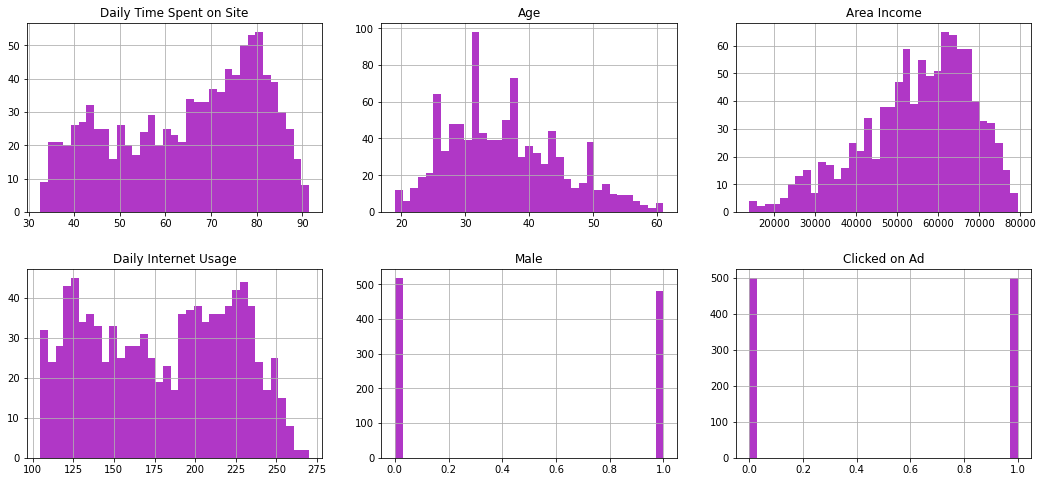

In [197]:
#Visualisez des graphiques/diagrammes en barre...
features = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male', 'Clicked on Ad']

ROWS, COLS = 2, 3
fig, ax = plt.subplots(ROWS, COLS, figsize=(18,8) )
row, col = 0, 0
for i, feature in enumerate(features):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    
#     df[feature].hist(bins=35, color='green', alpha=0.5, ax=ax[row, col]).set_title(feature)  #show all, comment off below 2 lines
    ad_data[feature].hist(bins=35, alpha=0.5, ax=ax[row, col]).set_title(feature)
    ad_data[feature].hist(bins=35, color='m', alpha=0.7, ax=ax[row, col])
fig.subplots_adjust(hspace=0.3)


# Logistic Regression

In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 62.6+ KB


In [135]:
from sklearn.model_selection import train_test_split

In [136]:
X = ad_data.drop(['Clicked on Ad'],axis=1)
X
y =ad_data['Clicked on Ad']
y

0      0
1      0
2      0
3      0
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: Clicked on Ad, Length: 1000, dtype: int64

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

- Train and fit a logistic regression model on the training set

In [138]:
from sklearn.linear_model import LogisticRegression

In [139]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)## Complétez

LogisticRegression()

## évaluation de la prédiction

- Utilisez la fonction predict() pour prédire sur le jeu de données X_test

In [140]:
predictions = logmodel.predict((X_test))## Complétez   

- Créer une matrice de report de la classification

In [141]:
from sklearn.metrics import classification_report

In [142]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       162
           1       0.96      0.85      0.90       168

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330



## Conclure : 
- Commentez les résultats de ce tableau. Ce modèle de régression logistique est-il bon pour prédire la variable cible ? Pourqou ?